In [9]:
pip install pyfasta seaborn pandas

SyntaxError: invalid syntax (<ipython-input-9-6af37266e80e>, line 1)

In [33]:
from pyfasta import Fasta
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt

983 minia 914 coronaspades assemblies


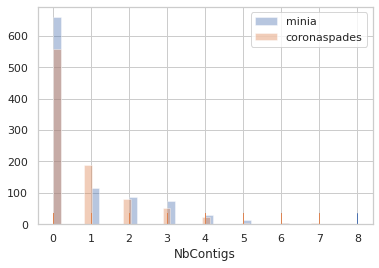

In [38]:
import glob
import os


assemblies = glob.glob("/home/rayan/serratus-assemblies/*.fa")
minia, coronaspades, = [], []
for assembly in assemblies:
    if "coronaspades.checkv_filtered" in assembly:
        coronaspades += [assembly]
    elif "minia.checkv_filtered" in assembly:
        minia += [assembly]
    
print(len(minia),"minia",len(coronaspades),"coronaspades assemblies")

data_to_insert = []
for assemblies,assembler in [(minia,'minia'),(coronaspades,'coronaspades')]:
    for assembly in assemblies:
        if os.stat(assembly).st_size == 0:
            nb_contigs = 0
        else:
            f = Fasta(assembly)
            nb_contigs = len(f.keys())
            total_length = sum([len(f[key]) for key in f.keys()])
        category = 'D'
        if   total_length > 25000  and nb_contigs == 1:
            category = 'A'
        elif total_length > 25000  and nb_contigs > 1:
            category = 'B'
        elif total_length > 5000 and total_length <= 25000:
            category = 'C'
        elif nb_contigs == 0:
            category = 'E'
        data_to_insert += [(assembly, assembler, nb_contigs, category)]
        
data = pd.DataFrame(data_to_insert, columns=['Assembly', 'Assembler', 'NbContigs', 'Category'])

sns.set(style="whitegrid")
sns.distplot(data[data['Assembler'] == 'minia']['NbContigs'], kde=False, rug=True, label="minia");
sns.distplot(data[data['Assembler'] == 'coronaspades']['NbContigs'], kde=False, rug=True, label="coronaspades");
plt.legend()



In [42]:
sns.catplot(x="Category", kind="count", data=data[data['Assembler'] == 'coronaspades');

ValueError: Could not interpret input 'Category'